# <font color='red'>IRIS FLOWER CLASSIFICATION MODEL</font>

### <font color='BLUE'>PROBLEM STATEMENT</font>

Using the iris flower dataset from `sklearn.datasets`, train a logistic regression model. Determine the accuracy of the model and use it to predict various samples in the test dataset. The iris dataset comprises 150 samples with the following features:

- **Sepal Length**
- **Sepal Width**
- **Petal Length**
- **Petal Width**

Classify each flower into one of three categories:

- **Setosa**
- **Versicolour**
- **Virginica**irginica


### <font color='BLUE'>OBJECTIVE</font>
The objective of this exercise is to train a logistic regression model using the iris flower dataset, determine its accuracy, and use it to predict the categories of various samples in the test dataset.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### <font color='BLUE'>DATA COLLECTTION</font>

In [4]:
#Load iris dataset
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
#target attribute which will give target variable, and already imported in numeric value from categorical data.
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### <font color='BLUE'>DATA DESCRIPTION</font>


The iris dataset is a classic dataset used for pattern recognition and classification, consisting of 150 samples of iris flowers. Each sample is described by four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters. The purpose of the dataset is to classify these samples into three distinct species of iris flowers: Setosa, Versicolour, and Virginica. The sepal length and width refer to the size of the outer parts of the flower that protect the petals, while the petal length and width refer to the size of the actual petals. Each of the 150 samples in the dataset is labeled with one of the three species: Setosa (label 0), Versicolour (label 1), or Virginica (label 2).

### <font color='BLUE'>EXPLORATORY DATA ANALYSIS (EDA)</font>

In [8]:
df.shape

(150, 5)

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [13]:
df["class"].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
#checking unique values 
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}, Length: {len(unique_values)}")

Unique values in sepal length (cm): [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9], Length: 35
Unique values in sepal width (cm): [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6], Length: 23
Unique values in petal length (cm): [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2], Length: 43
Unique values in petal width (cm): [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3], Length: 22
Unique values in class: [0 1 2], Length: 3


In [15]:
#Checking for duplicates
df.duplicated().sum()

1

In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [17]:
#Extracting column names except column class
col1 = df.columns.difference(['class'])

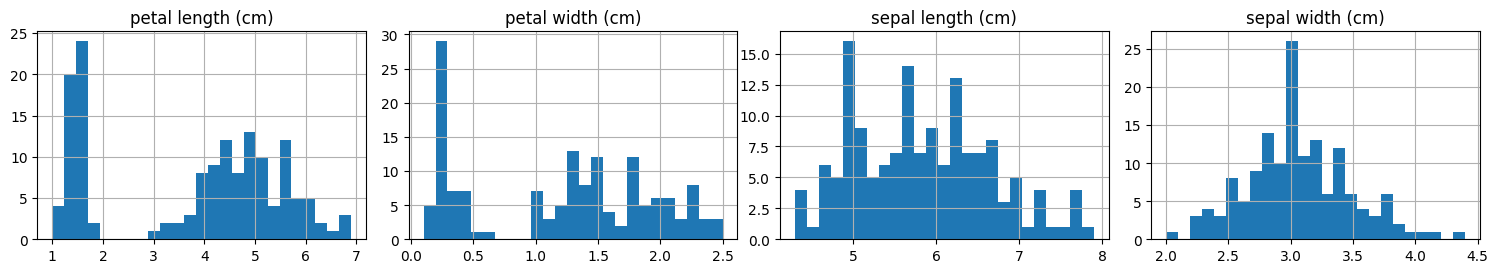

In [18]:
#create histogram for all columns
df[col1].hist(bins=25,figsize=(15,10),layout=(4,4))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

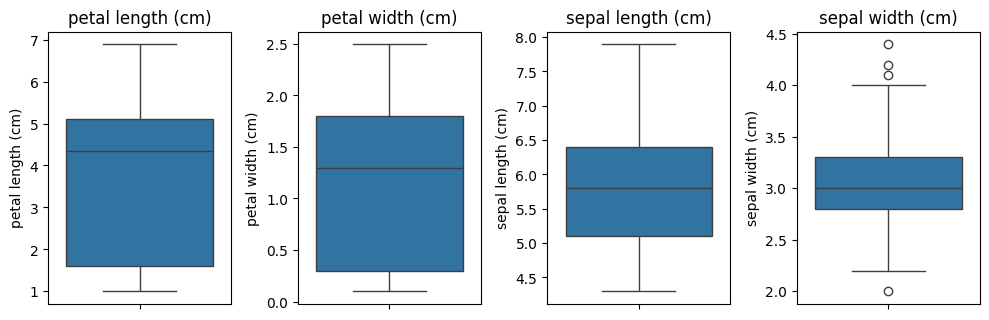

In [19]:
#Box plot to identify outliers
plt.figure(figsize=(10,15))
#enumerate is a buit in fn that allows you to loop over an iterable and have an automatic counter
for i,col in enumerate(col1):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show

##### The  sepal width column contain outliers

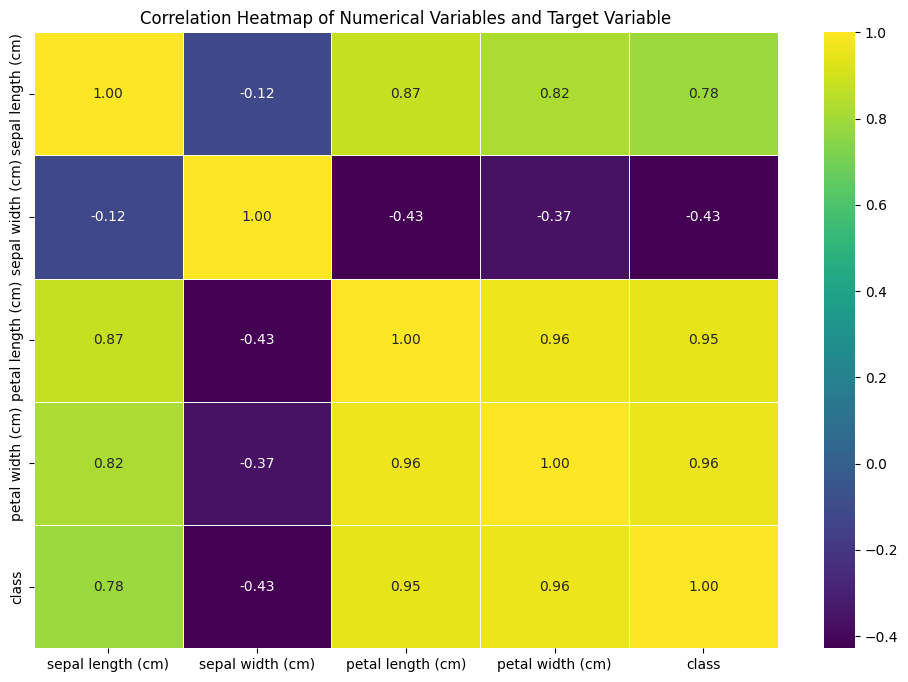

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

### <font color='BLUE'>DATA PREPROCESSING</font>

In [21]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


### Outlier Treatment

In [22]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [23]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

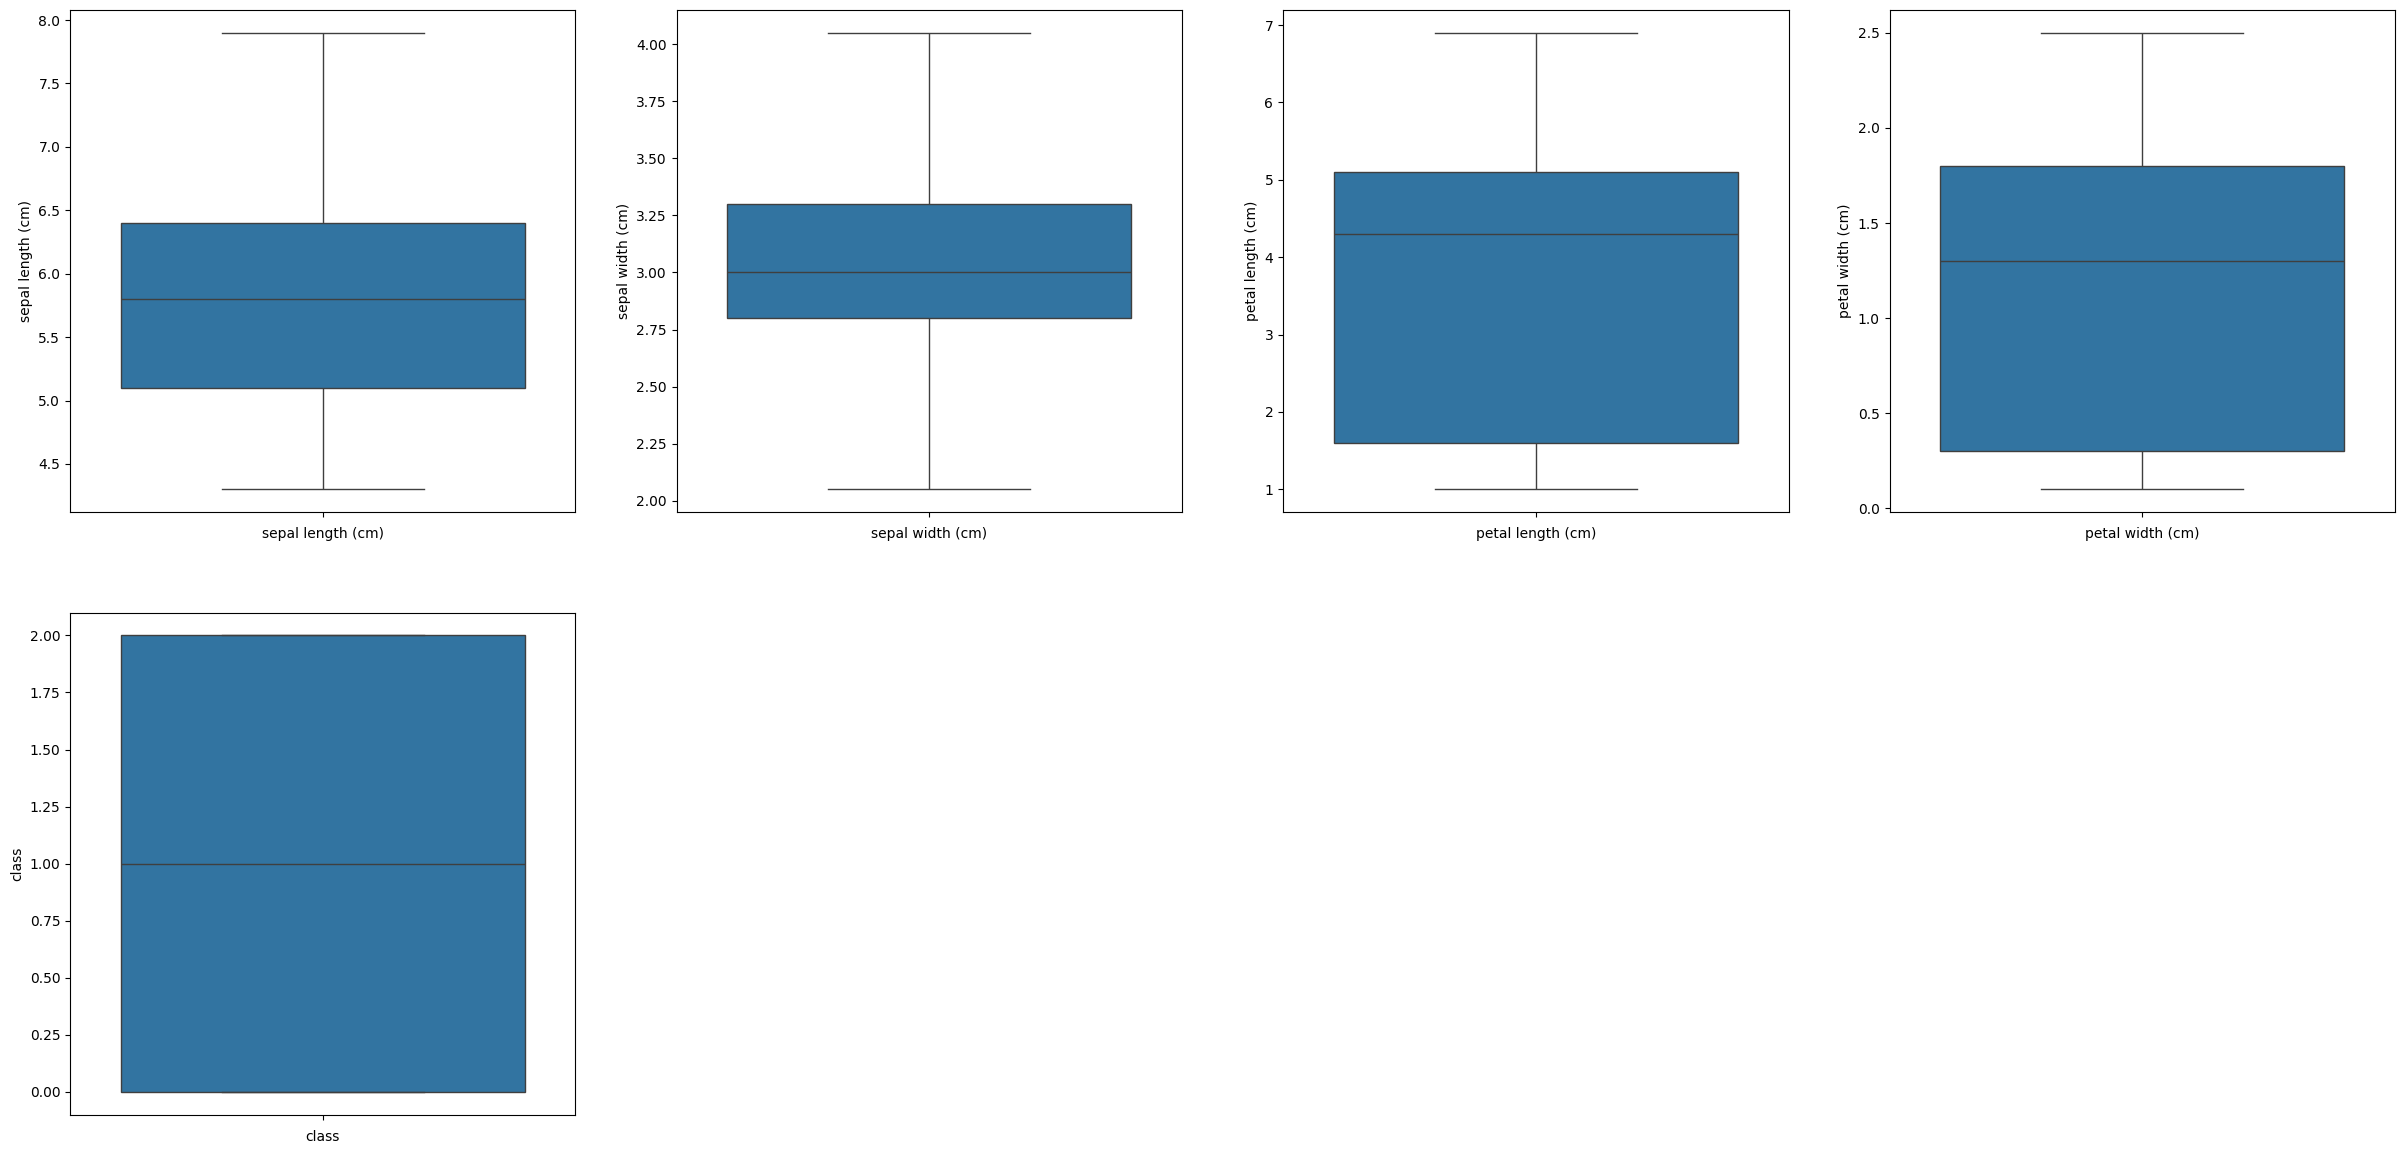

In [24]:
#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [25]:
df.shape

(149, 5)

##### There are no categorical columns, thus encoding is not required.

### Feature Scaling

In [26]:

from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col1])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=col1)

df[col1] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


### <font color='BLUE'>VISUALIZATION</font>

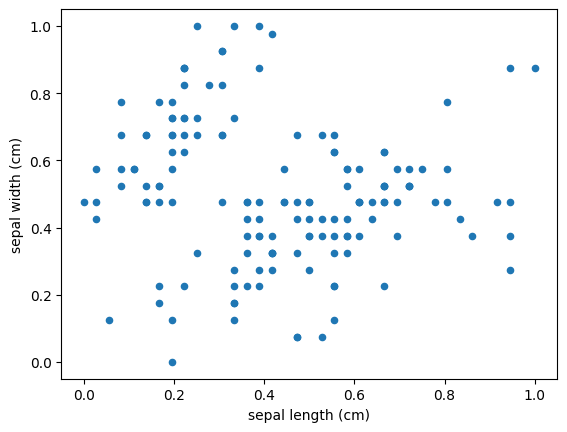

In [27]:
df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')
plt.show()

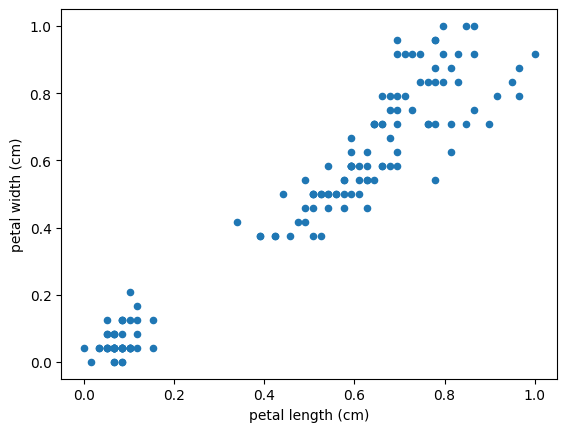

In [28]:
df.plot.scatter(x='petal length (cm)', y='petal width (cm)')
plt.show()

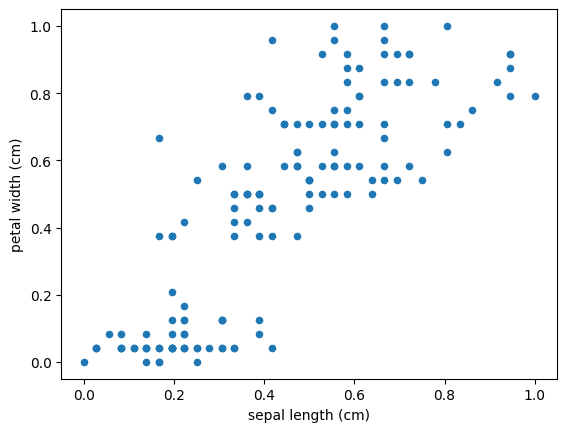

In [29]:
df.plot.scatter(x='sepal length (cm)', y='petal width (cm)')
plt.show()

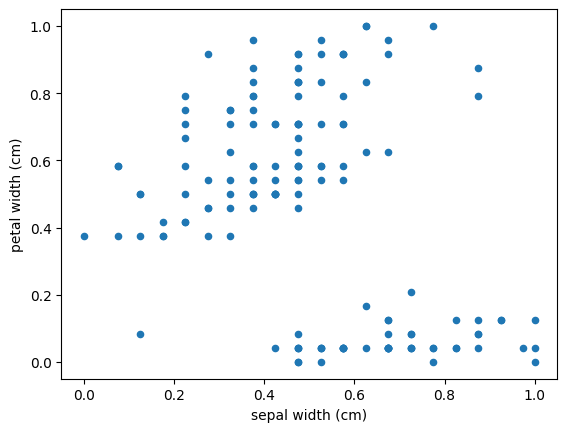

In [30]:
df.plot.scatter(x='sepal width (cm)', y='petal width (cm)')
plt.show()

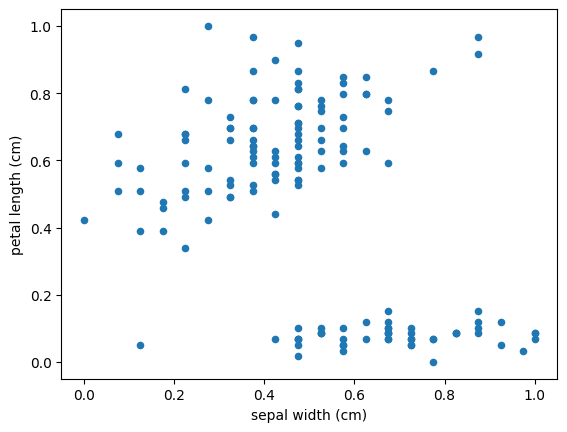

In [31]:
df.plot.scatter(x='sepal width (cm)', y='petal length (cm)')
plt.show()

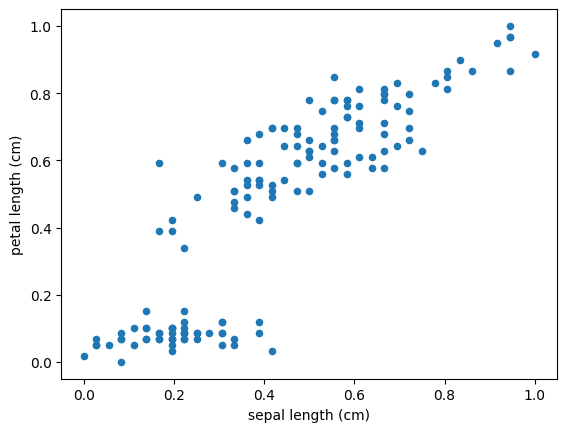

In [32]:
df.plot.scatter(x='sepal length (cm)', y='petal length (cm)')
plt.show()

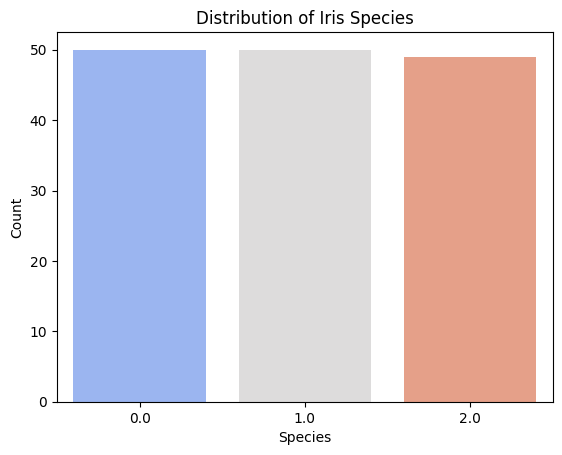

In [33]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df, palette = 'coolwarm')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

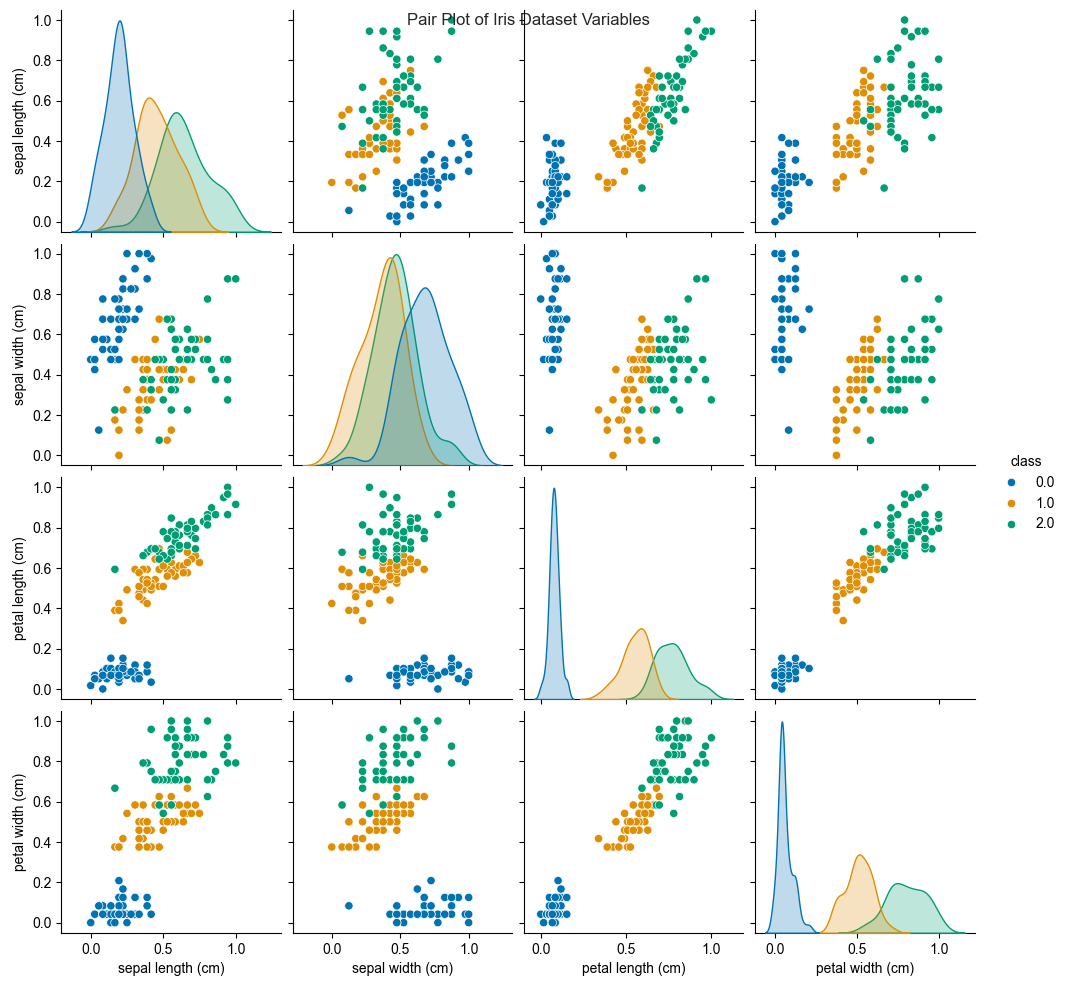

In [34]:
#create a pair plot
sns.pairplot(df,hue='class', palette='colorblind')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

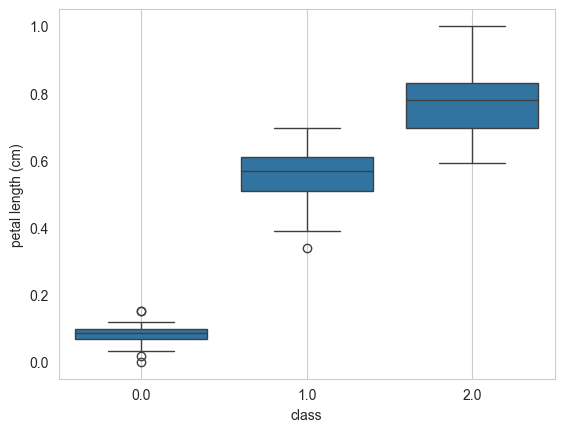

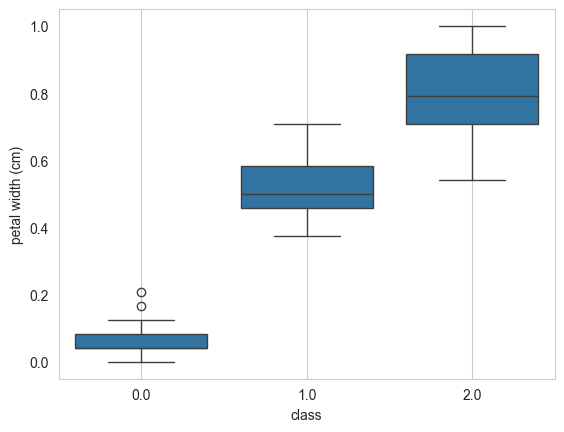

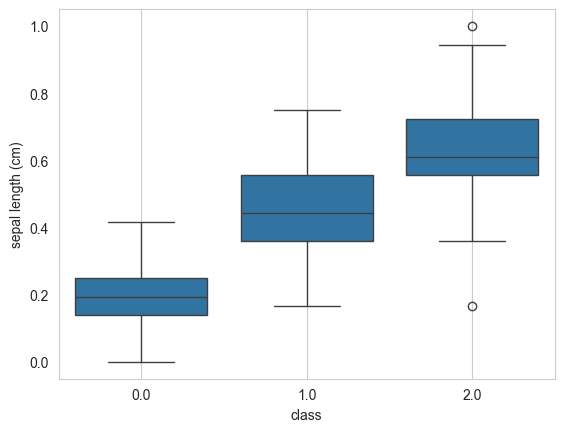

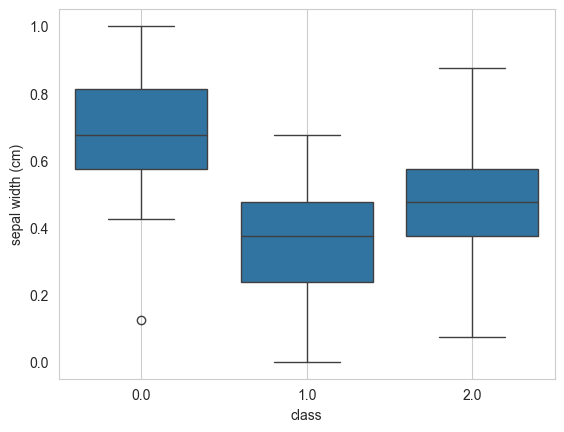

In [35]:
for col in df[col1]:
    plt.figure()
    sns.boxplot(data=df, x="class", y=df[col])
    plt.grid()
    plt.show()

### <font color='BLUE'>MODEL BUILDING</font>

#### Data Spliting

In [36]:
x = df.drop('class', axis=1)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667
145,0.555556,0.225,0.677966,0.750000
146,0.611111,0.475,0.711864,0.791667
147,0.527778,0.675,0.745763,0.916667


In [37]:
y=df['class']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
Name: class, Length: 149, dtype: float64

In [38]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

##### USE THIS TRAINING AND TESTING SETS IN VARIOUS CLASSIFICATION ALGORITHMS 

### <font color='GREEN'>1.LOGISTIC REGRESSION </font>

In [39]:
from sklearn.linear_model import LogisticRegression

#create object
Logistic_Model = LogisticRegression()

#Train the model with the provided training data
Logistic_Model.fit(x_train, y_train)

LogisticRegression()

In [40]:
Logistic_Model.score(x_test, y_test)

0.9333333333333333

In [41]:
y_PredictedLogistic = Logistic_Model.predict(x_test)
y_PredictedLogistic

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 2., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [42]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, y_PredictedLogistic)
cm_logistic

array([[16,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 12]], dtype=int64)


The element in the ith row and jth column of the matrix represents the number of instances of the actual class i that were predicted as class j.

In [43]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_logistic[0, 0]
FP = cm_logistic[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

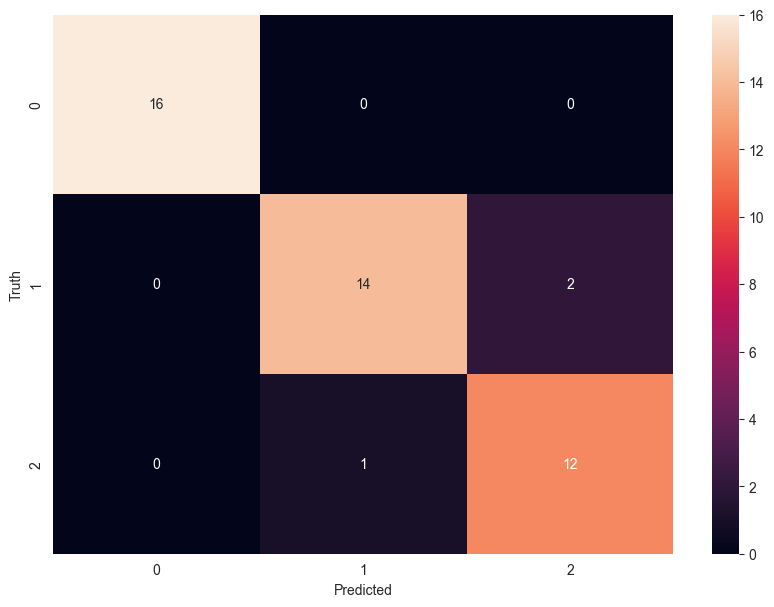

In [44]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_logistic, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### The actual value of 'class 1' was correctly predicted as 1 a total of 14 times, with 2 incorrect predictions as class 2. 'Class 2' was correctly predicted 12 times, with 1 incorrect prediction as class 1. All instances of 'class 0' were correctly classified

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_PredictedLogistic)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_PredictedLogistic))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.88      0.90        16
         2.0       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [47]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on test data
probslogistic = Logistic_Model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_log = roc_auc_score(y_test, probslogistic, multi_class='ovr')

print("AUC for logistic Classifier:", auc_log)

AUC for logistic Classifier: 0.9811284261715296


### <font color='GREEN'>2.DECISION TREE </font>

In [48]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier()
decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_predictedDecision= decision_model.predict(x_test)
y_predictedDecision

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [50]:
decision_model.score(x_test, y_test)

0.9555555555555556

In [51]:
#confusion Matrix
cm_decision = confusion_matrix(y_test,y_predictedDecision)
cm_decision

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [52]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_decision[0, 0]
FP = cm_decision[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

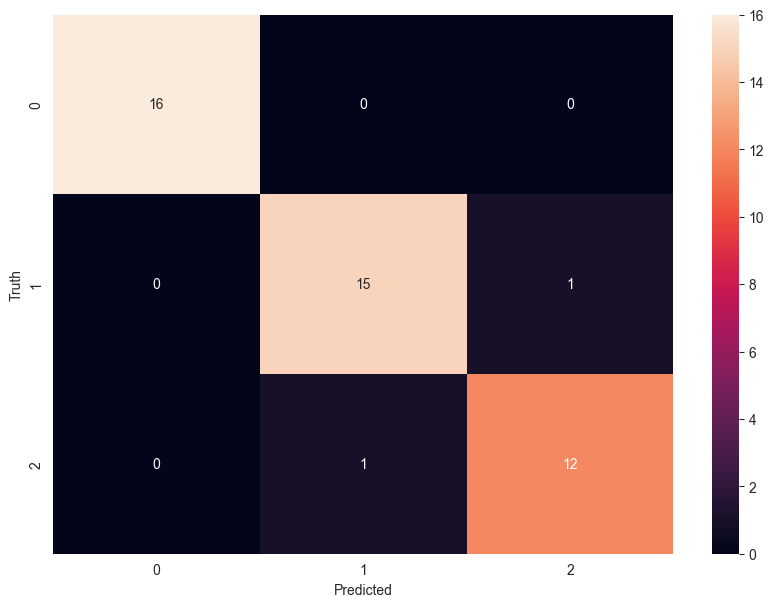

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_decision, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### The actual class 1 was correctly predicted as 1 a total of 15 times, with 1 incorrect prediction as class 2. Class 2 was correctly predicted as 2 a total of 12 times, with 1 incorrect prediction as class 1. All instances of class 0 were correctly predicted.

In [54]:
print(classification_report(y_test, y_predictedDecision))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



[Text(0.4, 0.9, 'x[3] <= 0.292\ngini = 0.666\nsamples = 104\nvalue = [34, 34, 36]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.2, 0.5, 'x[2] <= 0.678\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[0] <= 0.486\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 0.653\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.3, 'x[1] <= 0.525\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

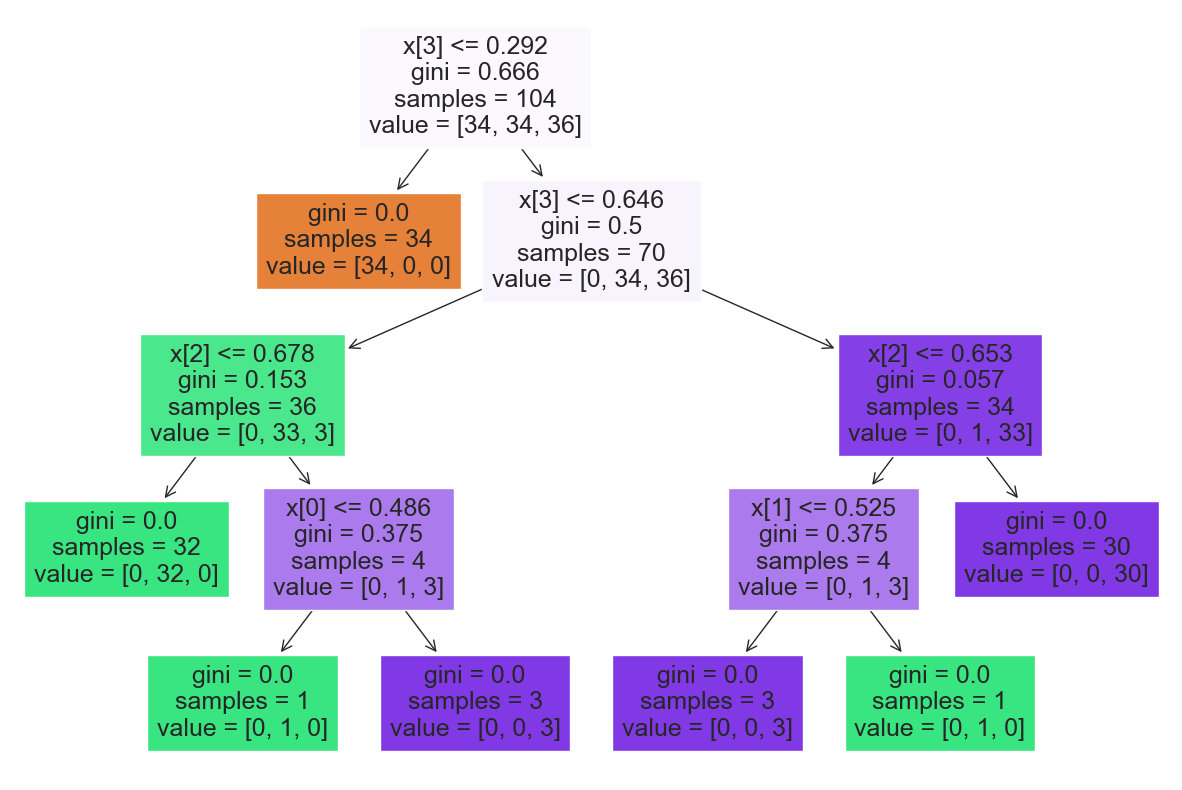

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model,filled=True)

Here, `x[3]` represents petal width in the iris dataset. The decision tree starts with a split based on whether `x[3]` is less than or equal to 0.8.

The dataset includes 36 samples of 'setosa', 32 samples of 'versicolor', and 37 samples of 'virginica'.

If `x[3] <= 0.8`, the tree moves to the left child node, where the Gini impurity is 0.0, indicating a pure node with all samples belonging to class 0 ('setosa').

If `x[3] > 0.8`, the tree moves to the right child node, where the next decision is based on `x[3] <= 1.65`. If `x[3] <= 1.65`, the tree moves to the left child node, where the decision depends on `x[2] <= 5.0`. Otherwise, the tree moves to the right child node, based on the decision `x[2] <= 4.85` (`x[2]` represents petal length).

This process continues until it reaches a leaf node with Gini impurity equal to 0.







### Post Pruning

In the tree, consider the third layer x[2]<=4.85. Here out of 35 samples, 34 belongs to virginica and 1 belongs to versicolor. In this case, further splitting is not necessary. We can prune the tree

In [56]:
# post pruning with max_depth=2
decision_model2=DecisionTreeClassifier(max_depth=2)
decision_model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 0.271\ngini = 0.666\nsamples = 104\nvalue = [34, 34, 36]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

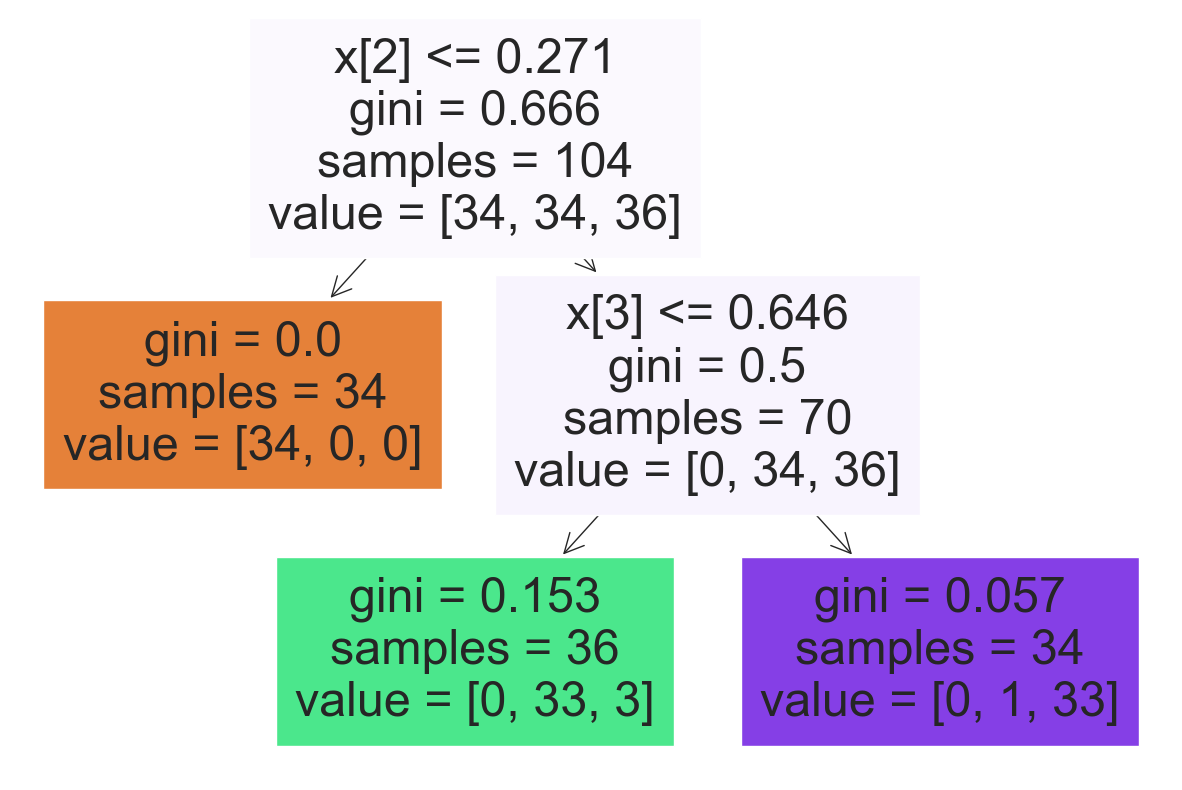

In [57]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model2,filled=True)

In [58]:
y_predictedpruned= decision_model2.predict(x_test)
y_predictedpruned

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [59]:
print(accuracy_score(y_predictedpruned,y_test))

0.9555555555555556


In [60]:
#Finding best model using ccp_alpha
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a function to train decision tree classifiers with pruning
def train_decision_tree_pruning(x_train, y_train, x_test, y_test):
    model = DecisionTreeClassifier()
    # Compute the complexity pruning path for the decision tree model based on the training data
    path = model.cost_complexity_pruning_path(x_train, y_train)
    # Extract effective alphas for pruning the decision tree
    ccp_alphas = path.ccp_alphas

    # Initialize empty lists to store trained models and their accuracies
    clfs = []
    accuracy = []

     # Loop through each value of ccp_alpha
    for ccp_alpha in ccp_alphas:
        # Instantiate a DecisionTreeClassifier with the current ccp_alpha
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        # Append the trained model to the list of classifiers
        clfs.append(clf)
        pred = clf.predict(x_test)
        # Calculate accuracy and append it to the accuracy list
        accuracy.append(accuracy_score(y_test, pred))

    return path,ccp_alphas,clfs, accuracy

path,ccp_alphas,clfs, accuracy = train_decision_tree_pruning(x_train, y_train, x_test, y_test)

print(path)
print(ccp_alphas)
print(clfs)
print(accuracy)

{'ccp_alphas': array([0.        , 0.00933258, 0.01442308, 0.03846154, 0.26471396,
       0.33015638]), 'impurities': array([0.        , 0.01866516, 0.03308824, 0.07154977, 0.33626374,
       0.66642012])}
[0.         0.00933258 0.01442308 0.03846154 0.26471396 0.33015638]
[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.00933257918552036, random_state=0), DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0), DecisionTreeClassifier(ccp_alpha=0.038461538461538464, random_state=0), DecisionTreeClassifier(ccp_alpha=0.2647139625080801, random_state=0), DecisionTreeClassifier(ccp_alpha=0.3301563820794591, random_state=0)]
[0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.6444444444444445, 0.28888888888888886]


In [61]:
decision_modelalpha=DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)
decision_modelalpha.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)

In [62]:
y_predalpha=decision_modelalpha.predict(x_test)
y_predalpha

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 2., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [63]:
#confusion Matrix
cm_bestccp = confusion_matrix(y_test,y_predalpha)
cm_bestccp

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 13]], dtype=int64)

In [64]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestccp[0, 0]
FP = cm_bestccp[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [65]:
print(classification_report(y_test, y_predalpha))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.94      0.97        16
         2.0       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [66]:
# Predict probabilities on test data#bestmodel using GridSearchCV
decision_model3=DecisionTreeClassifier()
probs_tree = decision_modelalpha.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.9893622900088417


In [67]:
#bestmodel using GridSearchCV
decision_model3=DecisionTreeClassifier()

In [68]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']    
}

In [69]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(decision_model3,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [70]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [71]:
y_pred3=cv.predict(x_test)
y_pred3

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [72]:
print(accuracy_score(y_pred3,y_test))

0.9555555555555556


In [73]:
best_modelgrid=DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='sqrt', splitter='best')
best_modelgrid.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [74]:
y_predictedbest=best_modelgrid.predict(x_test)

#confusion Matrix
cm_bestgrid = confusion_matrix(y_test,y_predictedbest)
cm_bestgrid

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [75]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestgrid[0, 0]
FP = cm_bestgrid[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [76]:
accuracy = accuracy_score(y_test, y_predictedbest)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [77]:
print(classification_report(y_test, y_predictedbest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [78]:
# Predict probabilities on test data
probs_tree = best_modelgrid.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.977536472148541


### <font color='GREEN'>3.NAIVE BAYE'S </font>

In [79]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [80]:
y_predictedNB = NB_model.predict(x_test)
y_predictedNB

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [81]:
print(accuracy_score(y_test,y_predictedNB))

0.9555555555555556


In [82]:
cm_nb = confusion_matrix(y_test, y_predictedNB)
cm_nb

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [83]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_nb[0, 0]
FP = cm_nb[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

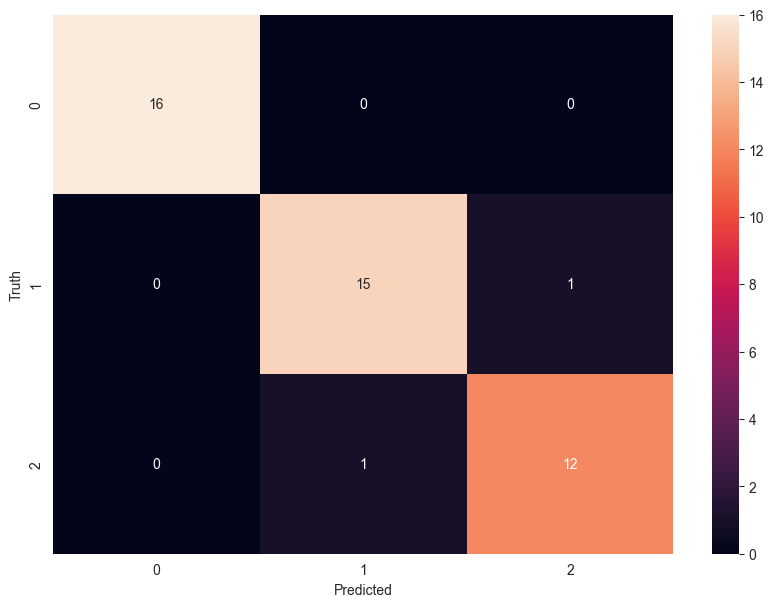

In [84]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_nb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### The class '1' is predicted correctly 18 times, with one incorrect prediction as class '2'. All instances of classes '0' and '2' are predicted correctly.

In [85]:
NB_model.score(x_test, y_test)

0.9555555555555556

In [86]:
print(classification_report(y_test,y_predictedNB))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [87]:
# Predict probabilities on test data
probsnb =NB_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_nb = roc_auc_score(y_test, probsnb, multi_class='ovr')

print("AUC for Naive Baye's Classifier:", auc_nb)

AUC for Naive Baye's Classifier: 0.993921308576481


### <font color='GREEN'>4.K NEAREST NEIGHBOUR (KNN) </font>

In [88]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
y_predictedknn = KNN_model.predict(x_test)
y_predictedknn

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [90]:
print(accuracy_score(y_test,y_predictedknn))

0.9555555555555556


In [91]:
cm_knn = confusion_matrix(y_test, y_predictedknn)
cm_knn

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [92]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_knn[0, 0]
FP = cm_knn[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

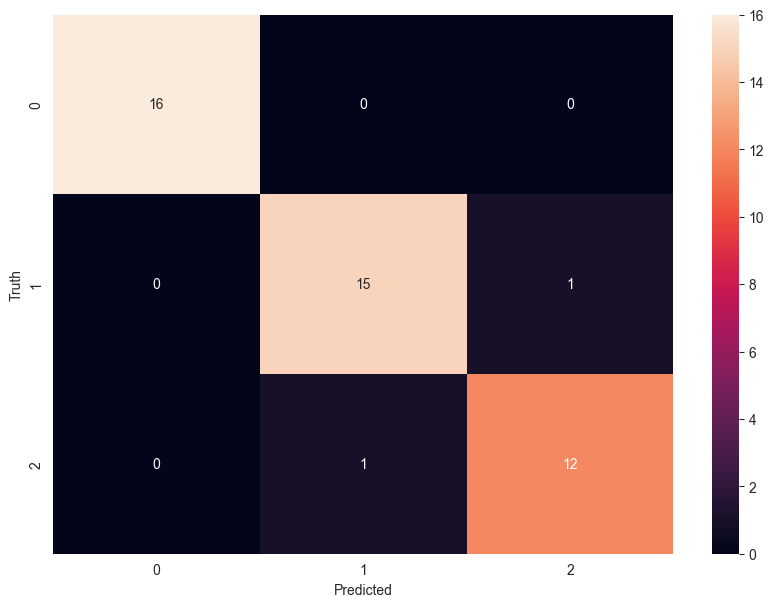

In [93]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### The class '1' is predicted correctly 18 times, with one incorrect prediction as class '2'. All instances of classes '0' and '2' are predicted correctly.

In [94]:
KNN_model.score(x_test, y_test)

0.9555555555555556

In [95]:
print(classification_report(y_test,y_predictedknn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [96]:
# Predict probabilities on test data
probsknn =KNN_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_knn = roc_auc_score(y_test, probsknn, multi_class='ovr')

print("AUC for KNN Classifier:", auc_knn)

AUC for KNN Classifier: 0.9977204907161803


### <font color='GREEN'>5.RANDOM FOREST </font>

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [98]:
y_predictedrf = rf_model.predict(x_test)
y_predictedrf

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [99]:
print(accuracy_score(y_test,y_predictedrf))

0.9555555555555556


In [100]:
cm_random = confusion_matrix(y_test, y_predictedrf)
cm_random

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [101]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_random[0, 0]
FP = cm_random[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

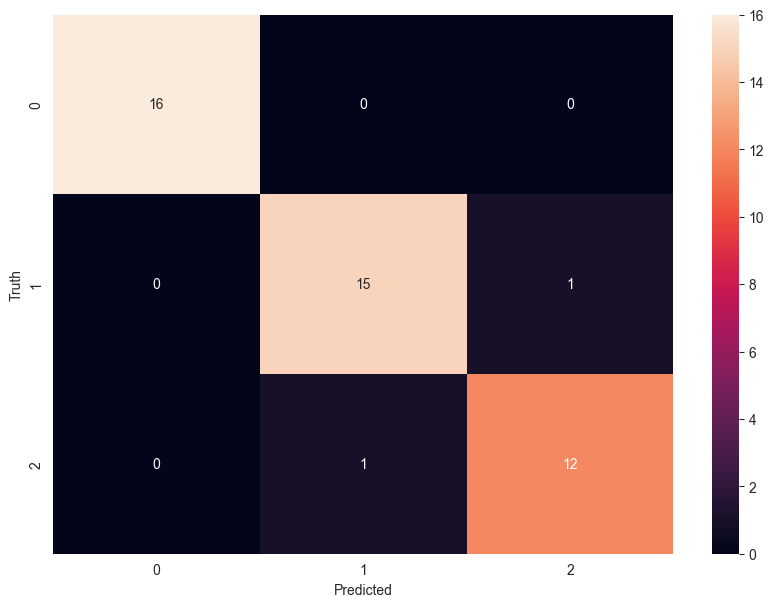

In [102]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_random, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### The class '1' is predicted correctly 15 times, with one incorrect prediction as class '2'. Similarly, class '2' is predicted correctly 12 times, with one incorrect prediction as class '1'. All instances of class '0' are predicted correctly.








In [103]:
rf_model.score(x_test, y_test)

0.9555555555555556

In [104]:
print(classification_report(y_test,y_predictedrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [105]:
# Predict probabilities on test data
probsrf = rf_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_rf = roc_auc_score(y_test, probsrf, multi_class='ovr')

print("AUC for Random Forest Classifier:", auc_rf)

AUC for Random Forest Classifier: 0.9784206454465075


### <font color='BLUE'>CONCLUSION</font>

Based on the performance metrics of various classifiers, we conclude the following:

- Logistic Regression achieves an accuracy of 93.33%, with high specificity and an AUC of 0.981. It shows good performance in precision, recall, and F1-score across all classes.

- Decision Tree Classifier exhibits an accuracy of 95.56% and an AUC of 0.978. It demonstrates excellent precision, recall, and F1-score for all classes.

- Random Forest Classifier matches the Decision Tree with an accuracy of 95.56% and an AUC of 0.978. It also performs well in precision, recall, and F1-score across all classes.

- K Nearest Neighbors (KNN) achieves an accuracy of 95.56% and a notably high AUC of 0.998. It maintains high precision, recall, and F1-score for all classes.

- Naive Bayes shows an accuracy of 95.56% and an AUC of 0.994. It performs well in precision, recall, and F1-score for all classes.

Overall, all classifiers demonstrate high accuracy and robust performance across key metrics, with KNN and Naive Bayes showing particularly high AUC values.





